# Random Numbers and Probability

## Importing Packages and Datasets

In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import uniform, binom

# Loading datasets
spotify = pd.read_csv("datasets/spotify.csv")
heart = pd.read_csv("datasets/heart.csv")

spotify.rename(columns={"top genre": "genre"}, inplace=True)
heart['sex'] = heart['sex'].replace({1: 'Male', 0: 'Female'})

group_id = ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J"]
group_size = [2, 4, 6, 2, 2, 2, 3, 2, 4, 2]
restaurant_groups = pd.DataFrame({"group_id": group_id, "group_size": group_size})

## Sampling

**Sampling Without Replacement:**

_Definition:_ In this method, each element is selected exactly once, and once selected, it is not available for future selections.

_Process:_ The selected element is removed from the dataset, reducing the pool of available elements for subsequent selections.

_Example:_ If you draw a card from a standard deck and do not put it back, the next draw is from a smaller deck.

**Sampling With Replacement:**

_Definition:_ In this method, each element is selected, and after selection, it is placed back into the dataset, making it available for future selections.

_Process:_ The dataset remains unchanged, and each draw is independent of previous draws.

_Example:_ If you draw a card from a standard deck and put it back, the deck size remains constant, and each draw is from the full deck.

**Key Considerations:**

_Without Replacement:_ Reduces the size of the population with each selection, leading to a decreasing pool of available elements.

_With Replacement:_ Allows for the same element to be selected more than once, maintaining a constant population size throughout the sampling process.

**Use Cases:**

_Without Replacement:_ Commonly used when each element should be unique in the sample, such as in simple random sampling.

_With Replacement:_ Useful when the same element can contribute to the sample more than once, or when the dataset is large, and the impact of a single draw on subsequent draws is negligible.

### Sampling without replacement

In [2]:
# Set random seed
np.random.seed(24)

# Sample 5 observations without replacement
sample_without_replacement = heart.sample(5, replace=False)

# Output the results
print("Random Sample Without Replacement:")
print(sample_without_replacement)

Random Sample Without Replacement:
     age     sex  cp  trestbps  chol  ...  oldpeak  slope  ca  thal  target
642   64    Male   0       128   263  ...      0.2      1   1     3       1
628   69  Female   3       140   239  ...      1.8      2   2     2       1
392   51    Male   2       110   175  ...      0.6      2   0     2       1
37    59    Male   0       138   271  ...      0.0      2   0     2       1
54    55    Male   0       140   217  ...      5.6      0   0     3       0

[5 rows x 14 columns]


### Sampling with replacement

In [3]:
# Set random seed
np.random.seed(24)

# Sample 5 observations with replacement
sample_with_replacement = heart.sample(5, replace=True)

# Output the results
print("Random Sample With Replacement:")
print(sample_with_replacement)

Random Sample With Replacement:
     age     sex  cp  trestbps  chol  ...  oldpeak  slope  ca  thal  target
418   62  Female   0       124   209  ...      0.0      2   0     2       1
899   59    Male   0       135   234  ...      0.5      1   0     3       1
192   67  Female   2       115   564  ...      1.6      1   0     3       1
343   52    Male   2       172   199  ...      0.5      2   0     3       1
145   40    Male   0       110   167  ...      2.0      1   0     3       0

[5 rows x 14 columns]


## Discrete Distributions

Discrete distributions model the probability of specific, separate outcomes with no values in between. Examples include the Bernoulli distribution for binary events and the Poisson distribution for counting the number of events in a fixed interval. These distributions are crucial for analyzing and predicting probabilities in scenarios where outcomes are countable and distinct.

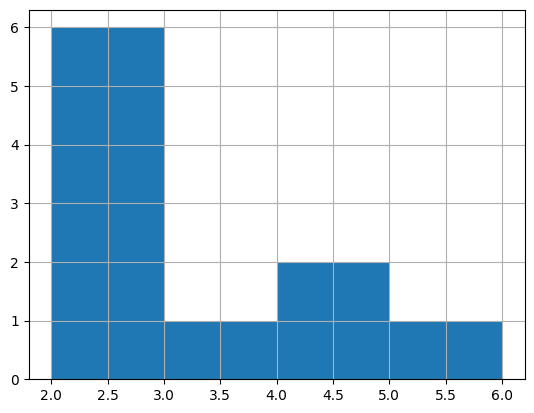

In [4]:
# Creating a histogram to visualize the discrete distribution
restaurant_groups['group_size'].hist(bins=np.linspace(2, 6, 5))
plt.show()

### Calculating probabilities and expected value

`Probability` is a measure of the likelihood of a specific event occurring, ranging from 0 (impossible) to 1 (certain). In the context of statistics, it quantifies the uncertainty or chance associated with various outcomes in a given experiment or scenario. Probability provides a mathematical foundation for reasoning about uncertain events and forms the basis for statistical inference and decision-making.

`The expected value`, also known as the mean or average, represents the anticipated value of a random variable based on its probability distribution. It is calculated by summing the products of each possible value and its corresponding probability. In practical terms, the expected value provides a central measure around which random outcomes are likely to cluster, offering valuable insights for decision-making and risk assessment.

In [5]:
# Calculate probability distribution
size_dist = restaurant_groups['group_size'].value_counts(normalize=True).reset_index()
size_dist.columns = ['group_size', 'probability']

# Calculate expected value
expected_value = np.sum(size_dist['group_size'] * size_dist['probability'])

# Display the probability distribution and expected value
print("Probability Distribution for Restaurant Group Sizes:")
print(size_dist)
print("\nExpected Value:", expected_value)

Probability Distribution for Restaurant Group Sizes:
   group_size  probability
0           2          0.6
1           4          0.2
2           6          0.1
3           3          0.1

Expected Value: 2.9000000000000004


In [6]:
# Extract groups with a size of 4 or more
groups_4_or_more = size_dist[size_dist["group_size"] > 3]

# Calculate the total probability for groups of size 4 or more
prob_4_or_more = groups_4_or_more["probability"].sum()

# Print the result
print("Total probability for groups of size 4 or more:", prob_4_or_more)

Total probability for groups of size 4 or more: 0.30000000000000004


### The Uniform Distribution

A uniform distribution is a probability distribution where every possible outcome is equally likely within a specified range. In this distribution, the probability density function remains constant across the entire range, forming a rectangular shape on a probability density graph. This type of distribution is characterized by a lack of skewness or bias toward any particular value, making each point in the range equally probable.

#### Cumulative Distribution Function for uniform distribution

`The Cumulative Distribution Function (CDF)` is a statistical concept that describes the probability that a random variable takes on a value less than or equal to a specified point. In other words, for any given value, the CDF provides the cumulative probability up to that point, offering insights into the likelihood of observing values below a certain threshold in a probability distribution.

**Example:**

Consider a situation where the arrival time of a bus at a bus stop follows a uniform distribution between 0 and 30 minutes. The Cumulative Distribution Function (CDF) for this uniform distribution would tell us the probability that the bus arrives within a certain timeframe. For instance, if we want to find the probability that the bus arrives within the first 5 minutes, we can use the CDF to calculate this probability, providing insights into the likelihood of the bus arriving early. Additionally, we can analyze related scenarios, such as the probability of waiting more than 5 minutes and the probability of waiting between 10 and 20 minutes:

In [7]:
# Define the time range for bus arrival (uniform distribution)
min_time = 0
max_time = 30

# Create a uniform distribution object
bus_arrival_distribution = uniform(loc=min_time, scale=max_time)

# Calculate the Cumulative Distribution Function (CDF) for different scenarios

# Probability of waiting less than or equal to 5 mins
prob_less_than_5 = bus_arrival_distribution.cdf(5)

# Probability of waiting more than 5 mins
prob_more_than_5 = 1 - prob_less_than_5

# Probability of waiting between 10 and 20 mins
prob_between_10_and_20 = bus_arrival_distribution.cdf(20) - bus_arrival_distribution.cdf(10)

# Print the results
print("Probability of waiting less than or equal to 5 mins:", prob_less_than_5)
print("Probability of waiting more than 5 mins:", prob_more_than_5)
print("Probability of waiting between 10 and 20 mins:", prob_between_10_and_20)

Probability of waiting less than or equal to 5 mins: 0.16666666666666666
Probability of waiting more than 5 mins: 0.8333333333333334
Probability of waiting between 10 and 20 mins: 0.3333333333333333


#### Simulating Uniform Distribution

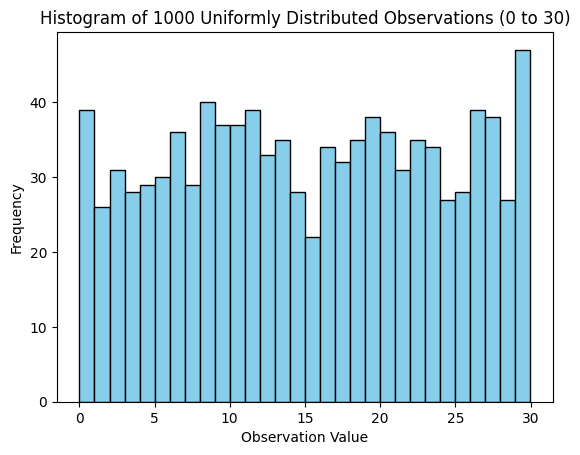

In [8]:
# Generate 1000 observations from a uniform distribution between 0 and 30
uniformly_distributed_values = uniform.rvs(0, 30, size=1000)

# Create a histogram of the simulated observations
plt.hist(uniformly_distributed_values, bins=30, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Observation Value')
plt.ylabel('Frequency')
plt.title('Histogram of 1000 Uniformly Distributed Observations (0 to 30)')

# Show the plot
plt.show()

In the displayed graph, the visual manifestation of a uniform distribution might not be immediately evident, primarily due to the relatively modest sample size of 1000 observations. It's noteworthy that as the sample size increases, the histogram becomes progressively more indicative of the underlying uniform distribution.

### The Binomial Distribution

The binomial distribution models the number of successes in a fixed number of independent and identically distributed binary trials. It is characterized by two parameters: the number of trials and the probability of success on each trial. The distribution is widely used for modeling phenomena with binary outcomes, such as success or failure.

#### Simulating Binomial Distribution

In [9]:
# Set random seed for reproducibility
np.random.seed(42)

# CASE 1:
# Simulate a single trial with a binomial distribution (1 trial, success probability 0.30)
outcome_single_trial = binom.rvs(1, 0.30, size=1)
print("Outcome of a single trial:", outcome_single_trial)

# CASE 2:
# Simulate a single trial with a binomial distribution (3 sub-trials, success probability 0.30)
outcome_multiple_trials = binom.rvs(3, 0.30, size=1)
print("Outcome of a single trial with three sub-trials:", outcome_multiple_trials)

# CASE 3:
# Simulate outcomes of 52 trials, each with 3 sub-trials, using a binomial distribution (success probability 0.30)
trial_outcomes = binom.rvs(3, 0.30, size=52)

# Calculate and print the mean number of successes per trial
mean_successes_per_trial = np.mean(trial_outcomes)
print("Mean number of successes per trial:", mean_successes_per_trial)

Outcome of a single trial: [0]
Outcome of a single trial with three sub-trials: [2]
Mean number of successes per trial: 0.7884615384615384


#### Calculating Binomial Probabilities

In [10]:
# Calculate the probability of exactly 3 successes in 3 trials with a success probability of 0.3
prob_3 = binom.pmf(3, 3, 0.3)
print("Probability of exactly 3 successes in 3 trials:", prob_3)

# Calculate the probability of 1 or fewer successes in 3 trials with a success probability of 0.3
prob_less_than_or_equal_1 = binom.cdf(1, 3, 0.3)
print("Probability of 1 or fewer successes in 3 trials:", prob_less_than_or_equal_1)

# Calculate the probability of more than 1 success in 3 trials with a success probability of 0.3
prob_greater_than_1 = 1 - binom.cdf(1, 3, 0.3)
print("Probability of more than 1 success in 3 trials:", prob_greater_than_1)

Probability of exactly 3 successes in 3 trials: 0.026999999999999996
Probability of 1 or fewer successes in 3 trials: 0.784
Probability of more than 1 success in 3 trials: 0.21599999999999997
